<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/Semi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
!python -m pip install konlpy

In [211]:
import codecs

In [212]:
positive= []
nagative = []
posneg = []

In [213]:
pos = codecs.open("./positive_words_self.txt", 'r')
positive = pos.readlines()

In [214]:
positive = [pos.replace("\n","")for pos in positive]

In [215]:
neg= codecs.open("./negative_words_self.txt", 'r')
negative = neg.readlines()

In [216]:
negative = [neg.replace("\n","")for neg in negative]

In [217]:
import pandas as pd

In [218]:
df = pd.read_excel('./semi.xls', names=['title', 'press', 'category', 'date', 'name', 'text'])
 

In [219]:
df

,title,press,category,date,name,text
0,중국에 대립각 세우는 리투아니아…왜?,경향신문,국제>중국 | 정치>외교 | 국제>유럽_EU,2021/08/11,박은하 기자 eunha999@kyunghyang.com,중국에서 6000km 떨어진 발트해 연안 국가 리투아니아가 ‘대만 문제’를 두고 중...
1,"국민의힘, 계속 옮겨붙는 갈등의 불씨...진화할 수 있을까",경향신문,정치>선거 | 정치>국회_정당,2021/08/11,유정인·박순봉 기자 jeongin@kyunghyang.com,국민의힘 내홍이 깊어지고 있다. 이준석 대표와 윤석열 전 검찰총장 등 ‘투스톤(준스...
2,"[단독] 법관이 직원에게 성경 공부·의전 지시, 법원에서도 ‘직장 갑질’ 논란",경향신문,국제>미국_북미 | 국제>유럽_EU | 사회>여성,2021/08/11,이혜리 기자 lhr@kyunghyang.com,법관에게 직장 내 갑질 및 괴롭힘을 당했다며 도움을 호소하는 법원 직원의 글이 법원...
3,"코로나 확진자수 2000명 돌파에 노심초사 여, 공세 강화하는 야",경향신문,정치>국회_정당 | 정치>청와대,2021/08/11,유설희 기자 sorry@kyunghyang.com,코로나19 신규 확진자가 11일 사상 처음으로 2000명을 돌파하자 여권은 ‘노심초...
4,"류호정 ""피해자 보호 못하는 강간죄 개정 위해 '쇼'라도 하겠다""",경향신문,정치>행정_자치 | 사회>여성 | 정치>국회_정당,2021/08/11,장은교 소통·젠더데스크 indi@kyunghyang.com,류호정 정의당 의원은 새로운 ‘쇼’를 궁리 중이라고 했다. 이번엔 강간죄 개정을 위...
...,...,...,...,...,...,...
94,죽파리 자작나무 숲 인근 ‘송하리 졸참나무와 당숲’ 천연기념물 된다,경향신문,문화>학술_문화재 | 문화>미술_건축 | 지역>강원,2021/08/11,김종목 기자 jomo@kyunghyang.com,문화재청이 ‘영양 송하리 졸참나무와 당숲’을 국가지정문화재 천연기념물로 지정 예고했...
95,"섬유·제지 산업도 탄소중립 움직임···""폐자원을 에너지로""",경향신문,경제>반도체 | 지역>강원 | 지역>충남,2021/08/11,강연주 기자 play@kyunghyang.com,정부가 섬유·제지 산업에서 탄소배출량을 줄이는 기술 개발에 투자를 강화한다.산업통상...
96,현대차·BMW·벤츠 등 35개 차종 2만8946대 리콜,경향신문,경제>자동차 | IT_과학>인터넷_SNS | IT_과학>보안,2021/08/11,김희진 기자 hjin@kyunghyang.com,국토교통부는 현대자동차와 BMW 등 35개 차종 총 2만8946대에서 제작결함이 발...
97,"박용진 ""4차 산업혁명 선도하는 '바이미식스' 대통령 되겠다""",경향신문,정치>국회_정당 | 정치>선거 | 정치>청와대,2021/08/11,탁지영 기자 g0g0@kyunghyang.com,더불어민주당 대선 경선 후보인 박용진 의원은 11일 “4차 산업혁명 대통령이 되겠다...


In [220]:
df.head(5) # title, press, category, date, name, text

,title,press,category,date,name,text
0,중국에 대립각 세우는 리투아니아…왜?,경향신문,국제>중국 | 정치>외교 | 국제>유럽_EU,2021/08/11,박은하 기자 eunha999@kyunghyang.com,중국에서 6000km 떨어진 발트해 연안 국가 리투아니아가 ‘대만 문제’를 두고 중...
1,"국민의힘, 계속 옮겨붙는 갈등의 불씨...진화할 수 있을까",경향신문,정치>선거 | 정치>국회_정당,2021/08/11,유정인·박순봉 기자 jeongin@kyunghyang.com,국민의힘 내홍이 깊어지고 있다. 이준석 대표와 윤석열 전 검찰총장 등 ‘투스톤(준스...
2,"[단독] 법관이 직원에게 성경 공부·의전 지시, 법원에서도 ‘직장 갑질’ 논란",경향신문,국제>미국_북미 | 국제>유럽_EU | 사회>여성,2021/08/11,이혜리 기자 lhr@kyunghyang.com,법관에게 직장 내 갑질 및 괴롭힘을 당했다며 도움을 호소하는 법원 직원의 글이 법원...
3,"코로나 확진자수 2000명 돌파에 노심초사 여, 공세 강화하는 야",경향신문,정치>국회_정당 | 정치>청와대,2021/08/11,유설희 기자 sorry@kyunghyang.com,코로나19 신규 확진자가 11일 사상 처음으로 2000명을 돌파하자 여권은 ‘노심초...
4,"류호정 ""피해자 보호 못하는 강간죄 개정 위해 '쇼'라도 하겠다""",경향신문,정치>행정_자치 | 사회>여성 | 정치>국회_정당,2021/08/11,장은교 소통·젠더데스크 indi@kyunghyang.com,류호정 정의당 의원은 새로운 ‘쇼’를 궁리 중이라고 했다. 이번엔 강간죄 개정을 위...


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     99 non-null     object
 1   press     99 non-null     object
 2   category  99 non-null     object
 3   date      99 non-null     object
 4   name      99 non-null     object
 5   text      99 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


In [222]:
df.shape

(99, 6)

In [223]:
df.columns

Index(['title', 'press', 'category', 'date', 'name', 'text'], dtype='object')

In [224]:
pd.DataFrame(df).iloc[1:]

,title,press,category,date,name,text
1,"국민의힘, 계속 옮겨붙는 갈등의 불씨...진화할 수 있을까",경향신문,정치>선거 | 정치>국회_정당,2021/08/11,유정인·박순봉 기자 jeongin@kyunghyang.com,국민의힘 내홍이 깊어지고 있다. 이준석 대표와 윤석열 전 검찰총장 등 ‘투스톤(준스...
2,"[단독] 법관이 직원에게 성경 공부·의전 지시, 법원에서도 ‘직장 갑질’ 논란",경향신문,국제>미국_북미 | 국제>유럽_EU | 사회>여성,2021/08/11,이혜리 기자 lhr@kyunghyang.com,법관에게 직장 내 갑질 및 괴롭힘을 당했다며 도움을 호소하는 법원 직원의 글이 법원...
3,"코로나 확진자수 2000명 돌파에 노심초사 여, 공세 강화하는 야",경향신문,정치>국회_정당 | 정치>청와대,2021/08/11,유설희 기자 sorry@kyunghyang.com,코로나19 신규 확진자가 11일 사상 처음으로 2000명을 돌파하자 여권은 ‘노심초...
4,"류호정 ""피해자 보호 못하는 강간죄 개정 위해 '쇼'라도 하겠다""",경향신문,정치>행정_자치 | 사회>여성 | 정치>국회_정당,2021/08/11,장은교 소통·젠더데스크 indi@kyunghyang.com,류호정 정의당 의원은 새로운 ‘쇼’를 궁리 중이라고 했다. 이번엔 강간죄 개정을 위...
5,[뉴스분석]현실화된 정은경의 예언···확진자 2223명이 정점은 아니다,경향신문,사회>의료_건강,2021/08/11,노도현·김향미·이혜리 기자 hyunee@kyunghyang.com,코로나19 하루 신규 확진자가 2200명을 넘어서며 새로운 국면을 맞고 있다. 20...
...,...,...,...,...,...,...
94,죽파리 자작나무 숲 인근 ‘송하리 졸참나무와 당숲’ 천연기념물 된다,경향신문,문화>학술_문화재 | 문화>미술_건축 | 지역>강원,2021/08/11,김종목 기자 jomo@kyunghyang.com,문화재청이 ‘영양 송하리 졸참나무와 당숲’을 국가지정문화재 천연기념물로 지정 예고했...
95,"섬유·제지 산업도 탄소중립 움직임···""폐자원을 에너지로""",경향신문,경제>반도체 | 지역>강원 | 지역>충남,2021/08/11,강연주 기자 play@kyunghyang.com,정부가 섬유·제지 산업에서 탄소배출량을 줄이는 기술 개발에 투자를 강화한다.산업통상...
96,현대차·BMW·벤츠 등 35개 차종 2만8946대 리콜,경향신문,경제>자동차 | IT_과학>인터넷_SNS | IT_과학>보안,2021/08/11,김희진 기자 hjin@kyunghyang.com,국토교통부는 현대자동차와 BMW 등 35개 차종 총 2만8946대에서 제작결함이 발...
97,"박용진 ""4차 산업혁명 선도하는 '바이미식스' 대통령 되겠다""",경향신문,정치>국회_정당 | 정치>선거 | 정치>청와대,2021/08/11,탁지영 기자 g0g0@kyunghyang.com,더불어민주당 대선 경선 후보인 박용진 의원은 11일 “4차 산업혁명 대통령이 되겠다...


In [225]:
df.drop_duplicates(subset=None,inplace=True)  # 메서드가 적용되는 원본데이터를 변경할지 여부를 결정 

In [226]:
len(df)

99

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
x_data = df['title']
y_data = df['text']

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((74,), (74,), (25,), (25,))

# NLP(토큰화)

In [230]:
type(x_train)


pandas.core.series.Series

In [231]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','') #[a-zA-Z]]

5                     뉴스분석현실화된 정은경의 예언확진자 명이 정점은 아니다
1                       국민의힘 계속 옮겨붙는 갈등의 불씨진화할 수 있을까
40    서울국제여성영화제 일 개막개막작은 무민 작가 토베 얀손의 퀴어 예술가 삶 조명 다큐
17                     집단면역 불가능영국싱가포르의 코로나와 함께 살기 실험
8                             김여정 주한미군 철수 주장 담화의 의미는
                           ...                      
9                     인건비 늘고 신작 출시 지연게임  나란히 분기 실적부진
52                   여전한 정치권 유리천장국회의원 여성할당제 남녀 의견 판이
87                문 대통령 감염 확산 못 막으면 확진자 더 늘어날 중요한 시점
63                      이낙연 지방 거점 국립대 등록금 없는 대학 만들겠다
41                 뜨거워지는 지구 전 세계 식량 생산도 위태롭다식단 전환 필요
Name: title, Length: 74, dtype: object

In [232]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  85830      0 --:--:-- --:--:-- --:--:-- 85830


In [233]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [234]:
from konlpy.tag import Mecab

In [235]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))   #형태소 분석

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [236]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


In [ ]:
for tok in x_train :
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])

sentance  

# Tokenizer


In [238]:
print(sentance)

[['[', '뉴스', '분석', ']', '현실', '화', '된', '정은경', '예언', '·', '·', '·', '확진', '자', '2223', '명', '정점', '아니'], ['국민', '힘', ',', '계속', '옮겨', '붙', '갈등', '불씨', '.', '..', '진화', '할', '수', '있', '을까'], ['서울', '국제', '여성', '영화제', '26', '일', '개막', '·', '·', '·', '개막', '작', '‘', '무민', '’', '작가', '토베', '얀손', '퀴어', '예술가', '삶', '조명', '다큐'], ['“', '집단', '면역', '불', '가능', '”', '…', '영국', '·', '싱가포르', "'", '코로나', '함께', '살', '기', "'", '실험'], ['김여정', "'", '주한', '미군', '철수', '주장', "'", '담화', '의미'], ['"', '화이자', '·', '모더', '나', '백신', '2', '차접', '종일', '추석', '연휴', '겹치', '면', '5', '일', '씩', '앞당기', '기', '로', '"'], ['‘', '메타', '버스', '게임', '’', '‘', 'AI', '전자', '’…', '신입', '생', '충원', '율', '떨어진', '특성', '화', ',', '학과', '개편'], ['박용진', '"', '4', '차', '산업', '혁명', '선도', "'", '바', '이미', '식스', "'", '대통령', '되', '겠', '"'], ['BC', '카드', '·', '이마트', '24', ',', '데이터', '협력', 'MOU', '체결'], ['현대', '백화점', ',', '와인', '선물', '종이', '포장재', '로', '바꾼다'], ['양경수', '민주', '노총', '위원장', ',', '구속영장', '심사', '불출석', '…', '“', '문재인', '정부', '·', '민주당', '

In [239]:
import tensorflow as tf

In [240]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)  

In [ ]:
tokenizer.word_index 

In [ ]:
tokenizer.word_counts 

In [243]:
total_cnt = len(tokenizer.word_index) 

In [244]:
rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

In [245]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(703, 645, 91.74964438122333, 63.24417601380501)

In [246]:
vocab_size = total_cnt - rare_cnt

In [247]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word 

In [249]:
x_train = tokenizer.texts_to_sequences(sentance)

In [250]:
print(x_train[0:3]) 

[[11, 1, 1, 12, 1, 33, 1, 1, 1, 2, 2, 2, 18, 34, 1, 25, 1, 35], [36, 1, 3, 1, 1, 1, 1, 1, 19, 20, 1, 37, 1, 1, 1], [1, 1, 38, 39, 1, 15, 40, 2, 2, 2, 40, 1, 4, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1]]


In [251]:
len(x_train[0]), len(x_train[40]), len(x_train[50])

(18, 16, 20)

In [252]:
hist_len = [len(words) for words in x_train]

In [253]:
import matplotlib.pyplot as plt

(array([1., 0., 0., 0., 0., 1., 0., 0., 5., 0., 0., 2., 0., 1., 0., 0., 5.,
        0., 0., 6., 0., 0., 8., 0., 0., 7., 0., 3., 0., 0., 8., 0., 0., 7.,
        0., 0., 8., 0., 8., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 2.]),
 array([ 6.  ,  6.36,  6.72,  7.08,  7.44,  7.8 ,  8.16,  8.52,  8.88,
         9.24,  9.6 ,  9.96, 10.32, 10.68, 11.04, 11.4 , 11.76, 12.12,
        12.48, 12.84, 13.2 , 13.56, 13.92, 14.28, 14.64, 15.  , 15.36,
        15.72, 16.08, 16.44, 16.8 , 17.16, 17.52, 17.88, 18.24, 18.6 ,
        18.96, 19.32, 19.68, 20.04, 20.4 , 20.76, 21.12, 21.48, 21.84,
        22.2 , 22.56, 22.92, 23.28, 23.64, 24.  ]),
 <a list of 50 Patch objects>)

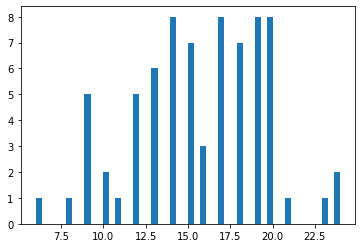

In [254]:
plt.hist(hist_len, bins=50)

In [255]:
sum(hist_len)/len(x_train)

15.662162162162161

In [256]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=50)

In [257]:
y_train

5     코로나19 하루 신규 확진자가 2200명을 넘어서며 새로운 국면을 맞고 있다. 20...
1     국민의힘 내홍이 깊어지고 있다. 이준석 대표와 윤석열 전 검찰총장 등 ‘투스톤(준스...
40    제23회 서울국제여성영화제가 26일~9월1일 서울 마포구 문화비축기지와 메가박스 상...
17    코로나19 백신 접종률이 높은 영국과 싱가포르에서 ‘코로나와 함께 살기’ 실험이 이...
8     김여정 북한 노동당 부부장이 지난 10일 ‘김정은 국무위원장의 위임에 따라’ 발표한...
                            ...                        
9     ‘3N’으로 불리는 게임업계의 ‘3강 업체’ 엔씨소프트·넥슨·넷마블이 나란히 기대 ...
52    21대 총선에서 거대 양당의 여성 지역구 공천 비율이 13%에 불과한 것으로 나타났...
87    문재인 대통령이 11일 국내 코로나19 하루 확진자 수가 역대 최다를 기록한 데 대...
63    더불어민주당 대선 경선 후보인 이낙연 전 대표는 11일 지역대학 육성 공약으로 지역...
41    기후 변화에 따른 기온 상승으로 전 세계 식량 공급이 어려워질 것이라는 어두운 전망...
Name: text, Length: 74, dtype: object

In [258]:
import numpy as np

In [ ]:
np.unique(y_train)

In [260]:
len(x_train),len(y_train)

(74, 74)